### Data Generation

Use Multivariate Autoregressive (MVAR) model to simulate 4 channel singals

$$
{ \bf X } ( n ) = \sum _ { k = 1 } ^ { p } { \bf A } ( k ) { \bf X } ( n - k ) + { \bf U } ( n )
$$

* p = 2
* A1 = Bk[:,:,1], A2 = Bk[:,:,2]
* U is random noise

We note that signal 3 contains both 0.1Hz and 0.3Hz


In [1]:
%% Author: Lu, Chia-Feng 2013.12.05
clear, close all
clc

%% initialize parameters
N=500;  % number of data points
M=4;    % number of variables
p=2; % maximum lag, the number of past points used for AR
r1=0.9; f1=0.1; % oscillation channel 1, f in Hz
r2=0; f2=0.1; % oscillation channel 2, f in Hz
r3=0.9; f3=0.3; % oscillation channel 3, f in Hz
r4=0; f4=0.1; % oscillation channel 4, f in Hz

%Residual covariance matrix (DIAGONAL)
Sw(1,:)=[1 0 0 0];
Sw(2,:)=[0 1 0 0];
Sw(3,:)=[0 0 1 0];
Sw(4,:)=[0 0 0 1];

%effects at lag 1
Bk(1,:,1)=[2*r1*cos(2*pi*f1) 0 0 0];
Bk(2,:,1)=[1 2*r2*cos(2*pi*f2) 0.5 0];
Bk(3,:,1)=[0 0.5 2*r3*cos(2*pi*f3) 0];
Bk(4,:,1)=[0 0 0 2*r4*cos(2*pi*f4)];
%effects at lag 2
Bk(1,:,2)=[-r1^2 0 0 0];
Bk(2,:,2)=[0 -r2^2 0 0];
Bk(3,:,2)=[0 0.5 -r3^2 0];
Bk(4,:,2)=[1 0 0 -r4^2];

% concateno in matrice Bm
A=[];
for kk=1:p
    A=[A Bk(:,:,kk)];
end

%% create simulated signal
U=randn(M,N); % uncorrelated gaussian innovations/noises
X=zeros(M,N);
for n=1:N
    for k=1:p
        if n-k<=0, break; end; % if n<=p, stop when k>=n
%         X(:,n)=X(:,n) + ( A(:,(k-1)*M+(1:M)) * X(:,n-k) );   % can also achieved by using MVARfilter function
          X(:,n)=X(:,n) + ( Bk(:,:,k) * X(:,n-k) );
    end
     X(:,n)=X(:,n)+U(:,n);
end

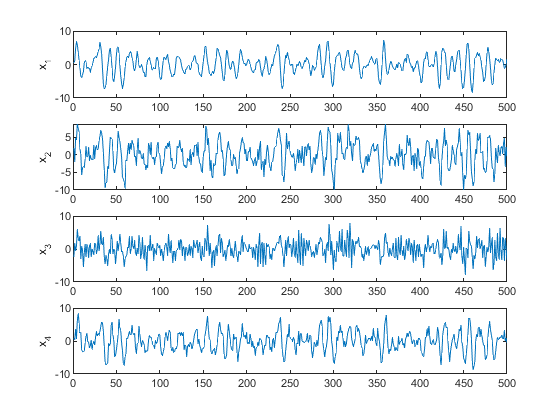

In [2]:
figure; % realizations of functions
for i=1:M
    subplot(M,1,i); plot(X(i,:));
    xlim([0 N]);
    ylabel(['x_' num2str(i)]);
end

In [3]:
save('test.mat','X')

### Coherence analysis
Estimate and display the coherence between channels using mscohere

In [3]:
%% initialize parameters
samplerate=1; % in Hz

noverlap=25; % overlapping for 25 data points
nfft=50;    % the length of each segement for welch average

% noverlap=50; % overlapping for 50 data points
% nfft=100;    % the length of each segement for welch average

% noverlap=0; % overlapping for 0 data point
% nfft=250;    % the length of each segement for welch average

% noverlap=0; % overlapping for 0 data point
% nfft=500;    % the length of each segement for welch average


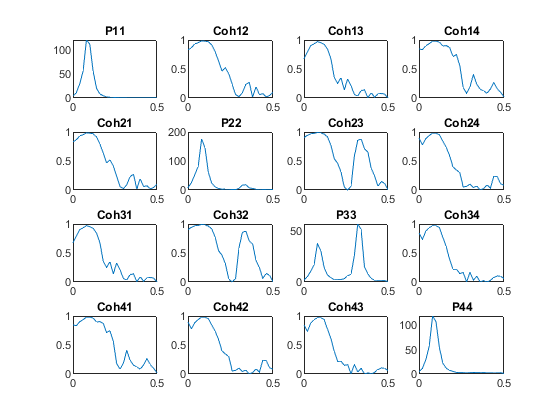

In [4]:
%% estimate and display the coherence between channels using mscohere
figure,
for i=1:M
    for j=1:M
        if i==j
            %%% plot power spectrum of channel i using pwelch's method
            [Sxx,F] = pwelch(X(i,:),hamming(nfft),noverlap,nfft,samplerate);
            subplot(M,M,(i-1)*M+j),plot(F,Sxx)
            title(['P' num2str(i) num2str(j)])
        else
            [Cxy,F] = mscohere(X(i,:),X(j,:),hamming(nfft),noverlap,nfft,samplerate);
            subplot(M,M,(i-1)*M+j),plot(F,Cxy)
            title(['Coh' num2str(i) num2str(j)])
        end
    end
end